In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data=  pd.read_csv('heartfailure.csv')
data.head()
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [3]:
x= data.iloc[:,0:13].values 
y= data['DEATH_EVENT'].values
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)


In [4]:
from sklearn.preprocessing import StandardScaler    
# Scale the features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [5]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_linear.predict(X_test_scaled)
accu_svm_linear = accuracy_score(y_pred_svm_linear, y_test)

print(f'SVM Linear Accuracy: {accu_svm_linear}')

SVM Linear Accuracy: 1.0


In [6]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred_svm_linear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        28

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



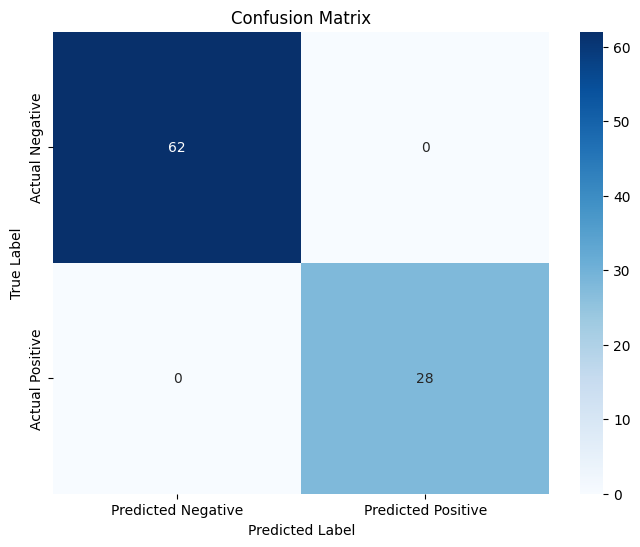

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_svm_linear are already defined
cm = confusion_matrix(y_test, y_pred_svm_linear)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
